# Figure

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.image import imread

params={'axes.labelsize': 8,
        'axes.titlesize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'axes.titlepad': 1,
        'axes.labelpad': 1,
        'lines.linewidth': 1,
        'legend.fontsize': 7
    }
matplotlib.rcParams.update(params)

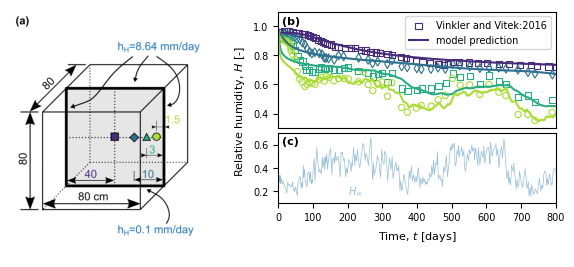

In [2]:
## Canvas design
figname= 'test'
fig_results= plt.figure(figname)
fig_results.set_size_inches(140/25.4, 63/25.4) # in mm

top= 0.99
btm= 0.22
rgt= 0.99
vspace = 0.13

w_f1= 0.357

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0, right=w_f1, bottom=0, top=1)
ax1 = plt.subplot(gs1[0,0])

gs2 = gridspec.GridSpec(1,1)
gs2.update(left=w_f1+vspace, right=rgt, bottom=0.52, top=top)
ax2 = plt.subplot(gs2[0,0])

gs3 = gridspec.GridSpec(1,1)
gs3.update(left=w_f1+vspace, right=rgt, bottom=btm, top=0.5)
ax3 = plt.subplot(gs3[0,0])


# Plot image
img = imread('sketch_Vinkler2016wall_v2.png')
ax1.imshow(img)
ax1.axis('off')


# Plot data 
humfile = 'DataExperiment_Vinkler2016_ambientHumidity.txt'
humpdata = np.loadtxt(humfile, skiprows=1)
humtime = humpdata[:, 0]
hum = humpdata[:, 1]/100


expfile400 = 'DataExperiment_Vinkler2016_400mm.txt'
expdata400 = np.loadtxt(expfile400, skiprows=1)
exptimeH400 = expdata400[:, 0]
expH400 = expdata400[:, 1]/100

expfile100 = 'DataExperiment_Vinkler2016_100mm.txt'
expdata100 = np.loadtxt(expfile100, skiprows=1)
exptimeH100 = expdata100[:, 0]
expH100 = expdata100[:, 1]/100

expfile30 = 'DataExperiment_Vinkler2016_30mm.txt'
expdata30 = np.loadtxt(expfile30, skiprows=1)
exptimeH30 = expdata30[:, 0]
expH30 = expdata30[:, 1]/100

expfile15 = 'DataExperiment_Vinkler2016_15mm.txt'
expdata15 = np.loadtxt(expfile15, skiprows=1)
exptimeH15 = expdata15[:, 0]
expH15 = expdata15[:, 1]/100


numfile = 'DataModel_simulation.txt'
numdata = np.loadtxt(numfile)
numtime = numdata[:, 0]
numH400 = numdata[:, 1]
numH100 = numdata[:, 2]
numH30 = numdata[:, 4]
numH15 = numdata[:, 5]


ax2.scatter(exptimeH400, expH400, label='Vinkler and Vitek:2016', 
         linewidth=0.8, marker='s', color='none', edgecolor='#472c7a', s=20)
ax2.scatter(exptimeH100, expH100, 
         linewidth=0.8, marker='d', color='none', edgecolor='#2c718e', s=20)
ax2.scatter(exptimeH30, expH30,
         linewidth=0.8, marker='s', color='none', edgecolor='#27ad81', s=20)
ax2.scatter(exptimeH15, expH15, 
         linewidth=0.8, marker='o', color='none', edgecolor='#aadc32', s=20)

ax2.plot(numtime, numH400, label='model prediction', linewidth=1.5, color='#472c7a')
ax2.plot(numtime, numH100, linewidth=1.5, color='#2c718e')
ax2.plot(numtime, numH30, linewidth=1.5, color='#27ad81')
ax2.plot(numtime, numH15, linewidth=1.5, color='#aadc32')

ax2.text(-130, -0.0, "Relative humidity, $H$ [-]", fontsize=8, color='black', rotation=90)

ax2.text(10, 1.015, "(b)", fontsize=8, color='black', weight='bold')
ax2.legend(loc='upper right')
# ax2.set_ylabel('Concrete humidity, $H_{mat}$ [°C]', labelpad=5)
# ax2.set_xlabel('Time, $t$ [days]', labelpad=5)
ax2.set_xticks([])
ax2.set_xlim(0, 800)
ax2.set_ylim(0.3, 1.1)


ax3.text(10, 0.6, "(c)", fontsize=8, color='black', weight='bold')
ax3.plot(humtime, hum, color='#94bed9', linestyle='-', linewidth=0.5)
ax3.text(200, 0.18, "$H_{\infty}$", fontsize=7, color='#94bed9')
# ax2.set_ylabel('Concrete humidity, $H_{mat}$ [°C]', labelpad=5)
ax3.set_xlabel('Time, $t$ [days]', labelpad=5)
ax3.set_xlim(0, 800)
ax3.set_ylim(0.1, 0.7)




# plt.legend()
plt.savefig('ModelVerification_ConcreteDryingMassiveElement.png', dpi=300)
plt.show()
